In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv("C:\\Users\\s\\OneDrive\\Desktop\\Data Science\\DATA SCIENCE\\MACHINE LEARNING\\MULTI LINEAR REGRESSION\\50_Startups.csv")

In [9]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
df.isnull().sum()  ### checking for null values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [12]:
df.info()  ### checking for complete information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [14]:
df["State"].unique()  ### checking type of entities in state column

array(['New York', 'California', 'Florida'], dtype=object)

In [19]:
a=pd.get_dummies(df["State"],drop_first=True) ### getting dummies for cotagorical data

In [20]:
a.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [21]:
df=df.drop(["State"],axis=1) ### droping or deleting state column 
     

In [22]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [26]:
df=pd.concat([df,a],axis=1) ### adding both informations

In [28]:
df.head() ### completly numerical data

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [32]:
X=df.drop(["Profit"],axis=1)
y=df["Profit"]

In [33]:
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [34]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [37]:
X_train.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
46,1315.46,115816.21,297114.46,1,0
47,0.00,135426.92,0.00,0,0
15,114523.61,122616.84,261776.23,0,1
9,123334.88,108679.17,304981.62,0,0
16,78013.11,121597.55,264346.06,0,0


In [40]:
X_train.shape

(33, 5)

In [41]:
y_train.head()

46     49490.75
47     42559.73
15    129917.04
9     149759.96
16    126992.93
Name: Profit, dtype: float64

In [42]:
y_train.shape

(33,)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
reg=LinearRegression()

In [47]:
reg.fit(X_train,y_train)

LinearRegression()

In [48]:
reg.intercept_

57183.41295217197

In [49]:
reg.coef_

array([ 8.04312540e-01, -8.99140461e-02,  2.84812890e-02,  4.03924487e+02,
       -1.21407965e+03])

In [50]:
y_train_pred=reg.predict(X_train)

In [52]:
y_train_pred

array([ 56694.07716541,  45006.63062018, 144512.857242  , 155297.68934747,
       116525.92444407, 113013.76150971,  86349.3742125 ,  93924.61183384,
       190089.75258858,  61909.01028595, 112528.69135221,  99068.57747849,
       163399.5925741 ,  98028.35104457, 137014.91440024,  74946.17221837,
       186994.61279621, 113729.48015644, 183526.36401409,  57999.3873584 ,
        91185.43447747, 111076.30148411,  74573.36956591, 136140.14104102,
       114701.11961731, 129516.0196457 ,  47951.5131393 , 116783.42821569,
       158526.98617222,  71764.57297254, 147289.19615997,  97656.01500381,
        71587.18986212])

In [52]:
y_train_pred

array([ 56694.07716541,  45006.63062018, 144512.857242  , 155297.68934747,
       116525.92444407, 113013.76150971,  86349.3742125 ,  93924.61183384,
       190089.75258858,  61909.01028595, 112528.69135221,  99068.57747849,
       163399.5925741 ,  98028.35104457, 137014.91440024,  74946.17221837,
       186994.61279621, 113729.48015644, 183526.36401409,  57999.3873584 ,
        91185.43447747, 111076.30148411,  74573.36956591, 136140.14104102,
       114701.11961731, 129516.0196457 ,  47951.5131393 , 116783.42821569,
       158526.98617222,  71764.57297254, 147289.19615997,  97656.01500381,
        71587.18986212])

In [58]:
X_pred=pd.DataFrame({"Actual_points":y_train,"Prdicted_points":y_train_pred})
X_pred

,Actual_points,Prdicted_points
46,49490.75,56694.077165
47,42559.73,45006.630620
15,129917.04,144512.857242
9,149759.96,155297.689347
16,126992.93,116525.924444
24,108552.04,113013.761510
34,96712.80,86349.374212
31,97483.56,93924.611834
0,192261.83,190089.752589
44,65200.33,61909.010286


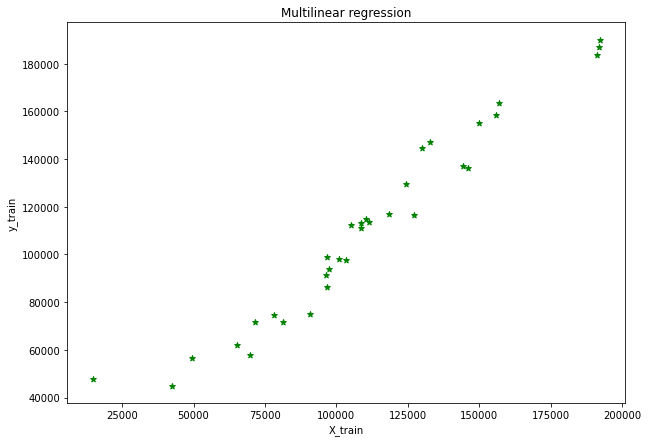

In [62]:
plt.figure(figsize=(10,7))
plt.title("Multilinear regression")
plt.xlabel("X_train")
plt.ylabel("y_train")
plt.scatter(y_train,y_train_pred,marker="*",color="g")
plt.plot(y_test,)
plt.show()

In [59]:
from sklearn.metrics import r2_score


In [60]:
r2_score(y_train,y_train_pred)

0.9483841429755522

In [63]:
r2_score(y_train,y_train_pred)*100

94.83841429755522

In [64]:
from sklearn.metrics import mean_squared_error

In [65]:
mean_squared_error(y_train,y_train_pred)

86483868.1070793

In [67]:
np.sqrt(mean_squared_error(y_train,y_train_pred))

9299.670322494196

### Test data

In [73]:
y_test_pred=reg.predict(X_test)

In [74]:
X_t=pd.DataFrame({"Actual_points":y_test,"Prdicted_points":y_test_pred})
X_t

,Actual_points,Prdicted_points
13,134307.35,126187.358759
39,81005.76,85719.456250
30,99937.59,99648.034932
45,64926.08,45664.955053
17,125370.37,127106.842490
48,35673.41,51752.874942
26,105733.54,109033.361857
25,107404.34,100575.614106
32,97427.84,97877.863567
19,122776.86,111674.706978


In [75]:
from sklearn.metrics import r2_score


In [76]:
r2_score(y_test,y_test_pred)

0.9475312056928278

In [77]:
r2_score(y_test,y_test_pred)*100

94.75312056928277

In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
mean_squared_error(y_test,y_test_pred)

74658919.97269887

In [80]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

8640.539333438559

### Prediction on own data points

In [81]:
X_train.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Florida',
       'New York'],
      dtype='object')

In [82]:
reg.predict([[12.2,15.5,20,0,0]])

C:\Users\s\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([57192.40152323])

### y = m1x1 + m2x2 + m3x3 + m4x4 + m5x5 + c

In [84]:
reg.coef_


array([ 8.04312540e-01, -8.99140461e-02,  2.84812890e-02,  4.03924487e+02,
       -1.21407965e+03])

In [85]:
reg.intercept_

57183.41295217197

In [88]:
y=(8.04312540e-01*12.2+ -8.99140461e-02*15.5 + 2.84812890e-02*20 + 4.03924487e+02*0 + -1.21407965e+03*0)+ 57183.41295

In [89]:
y

57192.40152105345